In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pymc as pm
import arviz as az

# Dataset

In [3]:
import pandas as pd
    # Example data, to display the format of the dictionary
    # {
    #    'routine_name': 'Routine 1',
    #    'duration_seconds': 75,
    #    'laugh_timestamps': ['00:05', '00:13', '00:21', '00:35', '00:48', '01:02']
    #},

# Dataframe with routines and laugh timestamps.
data = [
    {'routine_name': 'Sketch01', 'duration_seconds': 378, 'laugh_timestamps': ['00:08', '00:16', '00:25', '00:39', '00:54', '01:10', '01:19', '01:28', '01:37', '01:47', '01:52', '01:54', '02:15', '02:28', '02:42', '02:59', '03:03', '03:05', '03:17', '03:35', '03:43', '03:49', '03:53', '03:58', '04:00', '04:10', '04:20', '04:30', '04:52', '05:06', '05:09', '05:22', '05:44']},
    {'routine_name': 'Sketch02', 'duration_seconds': 450, 'laugh_timestamps': ['00:06', '00:27', '00:31', '00:55', '01:12', '01:20', '01:25', '01:35', '01:48', '01:53', '02:07', '02:13', '02:23', '02:28', '02:33', '02:45', '02:53', '02:58', '03:10', '03:15', '03:25', '03:28', '03:35', '03:46', '03:57', '04:06', '04:16', '04:30', '04:35', '04:41', '04:46', '04:53', '04:58', '05:03', '05:11', '05:18', '06:00', '06:07', '06:23', '06:27', '06:31', '06:38', '06:44', '06:51', '07:00']},
    {'routine_name': 'Sketch03', 'duration_seconds': 250, 'laugh_timestamps': ['00:11', '00:25', '00:28', '00:41', '00:46', '00:56', '01:12', '01:23', '01:28', '01:40', '01:48', '01:55', '02:25', '02:30', '02:37', '02:51', '02:57', '03:05', '03:20', '03:34', '03:38', '03:43', '04:02']},
    {'routine_name': 'Sketch04', 'duration_seconds': 257, 'laugh_timestamps': ['00:12', '00:15', '00:24', '00:41', '00:58', '01:07', '01:19', '01:25', '01:50', '01:54', '02:00', '02:26', '02:32', '02:41', '02:48', '03:02', '03:06', '03:11', '03:47', '03:58', '04:06']},
    {'routine_name': 'Sketch05', 'duration_seconds': 186, 'laugh_timestamps': ['00:11', '00:24', '00:33', '00:39', '00:47', '00:54', '01:04', '01:26', '01:32', '01:51', '02:09', '02:27', '02:32', '02:59', '03:02']},
    {'routine_name': 'Sketch06', 'duration_seconds': 328, 'laugh_timestamps': ['00:06', '00:17', '00:22', '00:29', '00:32', '00:55', '01:00', '01:20', '01:28', '01:32', '01:52', '02:10', '02:33', '02:37', '02:39', '02:50', '02:56', '03:11', '03:23', '03:32', '03:34', '03:43', '03:57', '04:08', '04:16', '04:26', '04:30', '04:32', '04:39', '04:48', '05:09']},
    {'routine_name': 'Sketch07', 'duration_seconds': 337, 'laugh_timestamps': ['00:11', '00:16', '00:20', '00:30', '00:42', '00:53', '01:00', '01:04', '01:24', '01:57', '02:00', '02:21', '02:27', '02:36', '02:39', '02:48', '03:03', '03:15', '03:31', '03:42', '03:49', '04:06', '04:23', '04:59', '05:02']},
    {'routine_name': 'Sketch08', 'duration_seconds': 211, 'laugh_timestamps': ['00:12', '00:18', '00:23', '00:30', '00:45', '00:53', '01:10', '01:24', '01:40', '01:50', '01:58', '02:05', '02:10', '02:15', '02:27', '02:37', '02:40', '02:45', '02:58', '03:06', '03:12', '03:17']},
    {'routine_name': 'Sketch09', 'duration_seconds': 52, 'laugh_timestamps': ['00:10', '00:15', '00:23', '00:29', '00:39', '00:43']},
    {'routine_name': 'Sketch10', 'duration_seconds': 320, 'laugh_timestamps': ['00:07', '00:13', '00:45', '00:54', '01:00', '01:04', '01:10', '01:23', '01:38', '01:50', '02:20', '02:29', '02:37', '02:49', '02:51', '03:01', '03:07', '03:13', '03:20', '03:37', '03:41', '03:49', '04:14', '04:21', '04:31', '04:45', '05:04']}
]
#    {'routine_name': 'Sketch10', 'duration_seconds': 465, 'laugh_timestamps': ['00:19', '00:30', '00:37', '00:55', '01:07', '02:27', '02:31', '03:09', '04:02', '04:44', '05:14', '05:26', '06:55', '07:04', '07:09']}
# Interesting - Sketch10:
# After cutting out the first 2 1/2 minutes (unrelated to cats), and increasing the hyperparameters to 0.5/0.2 (threshold/min-length) UP from 0.3/0.1,
# the laugh count increased from 16 to 28. So we increased the accuracy after cutting the duration of the sketch.

# Create DataFrame
df = pd.DataFrame(data)

In [4]:
df.head()

,routine_name,duration_seconds,laugh_timestamps
0,Sketch01,378,"[00:08, 00:16, 00:25, 00:39, 00:54, 01:10, 01:..."
1,Sketch02,450,"[00:06, 00:27, 00:31, 00:55, 01:12, 01:20, 01:..."
2,Sketch03,250,"[00:11, 00:25, 00:28, 00:41, 00:46, 00:56, 01:..."
3,Sketch04,257,"[00:12, 00:15, 00:24, 00:41, 00:58, 01:07, 01:..."
4,Sketch05,186,"[00:11, 00:24, 00:33, 00:39, 00:47, 00:54, 01:..."


# Data Analysis
Outliers can cause problems in this analysis. The model will not converge properly. As a rough guideline, joke intervals shouldn't be longer than 30 seconds. The standard deviation will address predictions beyond this. It's common sense - 30 seconds to get to a punchline is quite long. And it could also be the laugh detector doesn't recognize all types of laughter.

To address this I would go back and listen to the audio and manually insert the joke timestamps.

In [5]:
table_data = []

for routine in data:
    intervals = np.diff([0] + [int(ts.split(':')[0])*60 + int(ts.split(':')[1]) for ts in routine['laugh_timestamps']])
    routine_name = routine['routine_name']
    min_interval = np.round(np.min(intervals))
    max_interval = np.round(np.max(intervals))
    mean_interval = np.round(np.mean(intervals))
    
    table_data.append([routine_name, min_interval, max_interval, mean_interval])

# Create a DataFrame
df = pd.DataFrame(table_data, columns=['Routine', 'Min Interval', 'Max Interval', 'Mean Interval'])

# Print the DataFrame
df.head(100)

,Routine,Min Interval,Max Interval,Mean Interval
0,Sketch01,2,22,10.0
1,Sketch02,3,42,9.0
2,Sketch03,3,30,11.0
3,Sketch04,3,36,12.0
4,Sketch05,3,27,12.0
5,Sketch06,2,23,10.0
6,Sketch07,3,36,12.0
7,Sketch08,3,17,9.0
8,Sketch09,4,10,7.0
9,Sketch10,2,32,11.0


# Exploratory Data Analysis

## Distribution of joke intervals

Given all of the data, what are the frequencies of joke intervals i.e. - how long is it between the start of a joke, and when the audience laughs. We use that to signify a 'joke'. Once the audience laughs and stops, this signifies the beginning of the next joke. Even if the comedian isn't speaking and is doing something like getting a drink. This problem is similar to times for waiting rooms, or waiting in line. There are no negative values, and the frequency of length decreases.

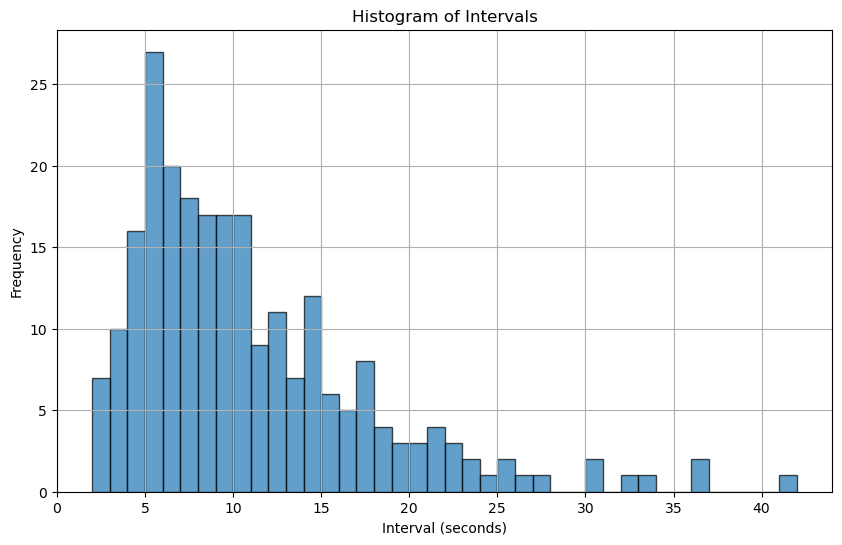

In [7]:
# Extract all interval values from the 'intervals' column
all_intervals = [interval for sublist in df['intervals'] for interval in sublist]
# Calculate the range of the intervals
interval_range = max(all_intervals) - min(all_intervals)
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_intervals, bins=interval_range, edgecolor='k', alpha=0.7)
plt.title('Histogram of Intervals')
plt.xlabel('Interval (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Create the model

In [35]:
import pandas as pd
def preprocess_data(data):
    processed_data = []
    for routine in data:
        laugh_times = [int(time.split(':')[0]) * 60 + int(time.split(':')[1]) for time in routine['laugh_timestamps']]
        intervals = np.diff(laugh_times)
        processed_data.append({
            'routine_name': routine['routine_name'],
            'duration_seconds': routine['duration_seconds'],
            'intervals': intervals,
            'num_laughs': len(routine['laugh_timestamps'])
        })
    return processed_data

processed_data = preprocess_data(data)
routines = pd.DataFrame(processed_data)
routines.head(10)

,routine_name,duration_seconds,intervals,num_laughs
0,Sketch01,378,"[8, 9, 14, 15, 16, 9, 9, 9, 10, 5, 2, 21, 13, ...",33
1,Sketch02,450,"[21, 4, 24, 17, 8, 5, 10, 13, 5, 14, 6, 10, 5,...",45
2,Sketch03,250,"[14, 3, 13, 5, 10, 16, 11, 5, 12, 8, 7, 30, 5,...",23
3,Sketch04,257,"[3, 9, 17, 17, 9, 12, 6, 25, 4, 6, 26, 6, 9, 7...",21
4,Sketch05,186,"[13, 9, 6, 8, 7, 10, 22, 6, 19, 18, 18, 5, 27, 3]",15
5,Sketch06,328,"[11, 5, 7, 3, 23, 5, 20, 8, 4, 20, 18, 23, 4, ...",31
6,Sketch07,337,"[5, 4, 10, 12, 11, 7, 4, 20, 33, 3, 21, 6, 9, ...",25
7,Sketch08,211,"[6, 5, 7, 15, 8, 17, 14, 16, 10, 8, 7, 5, 5, 1...",22
8,Sketch09,52,"[5, 8, 6, 10, 4]",6
9,Sketch10,320,"[6, 32, 9, 6, 4, 6, 13, 15, 12, 30, 9, 8, 12, ...",27


# The Model

In [250]:
def create_model(data):
    with pm.Model() as interval_model:
        # Global parameters for intervals
        mean, lower_bound, upper_bound = 10, 3, 25
        std = (upper_bound - lower_bound) / 4
        
        mu_global = pm.TruncatedNormal('mu_global', mu=mean, sigma=std, lower=lower_bound, upper=upper_bound)
        sigma_global = pm.HalfCauchy('sigma_global', beta=5)
        
        routine_mus = []
        
        for routine in data:
            # Calculate intervals from laugh timestamps
            timestamps = [int(t.split(':')[0])*60 + int(t.split(':')[1]) for t in routine['laugh_timestamps']]
            intervals = np.diff([0] + timestamps)
            
            # Routine-specific mean
            routine_mu = pm.Gamma(f'mu_{routine["routine_name"]}', 
                                  alpha=mu_global * sigma_global, 
                                  beta=sigma_global)
            
            # Observed intervals from observed data
            pm.Gamma(f'observed_intervals_{routine["routine_name"]}', 
                                          alpha=routine_mu * sigma_global,
                                          beta=sigma_global, 
                                          observed=intervals)
            
            routine_mus.append(routine_mu)
        
        interval_model.routine_mus = routine_mus
    
    return interval_model

# Create the model
model = create_model(data)

### Sample the model

In [310]:
def perform_inference(model):
    with model:
        # Use NUTS sampler (a variant of Hamiltonian Monte Carlo)
        trace = pm.sample(draws=10000, tune=2000, chains=4, return_inferencedata=True, target_accept=0.98)
        # check convergence diagnostics
        assert all(az.rhat(trace) < 1.03)

    return trace

trace = perform_inference(model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_global, sigma_global, mu_Sketch01, mu_Sketch02, mu_Sketch03, mu_Sketch04, mu_Sketch05, mu_Sketch06, mu_Sketch07, mu_Sketch08, mu_Sketch09, mu_Sketch10]


Output()

Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 83 seconds.


### View diagnostics and plots

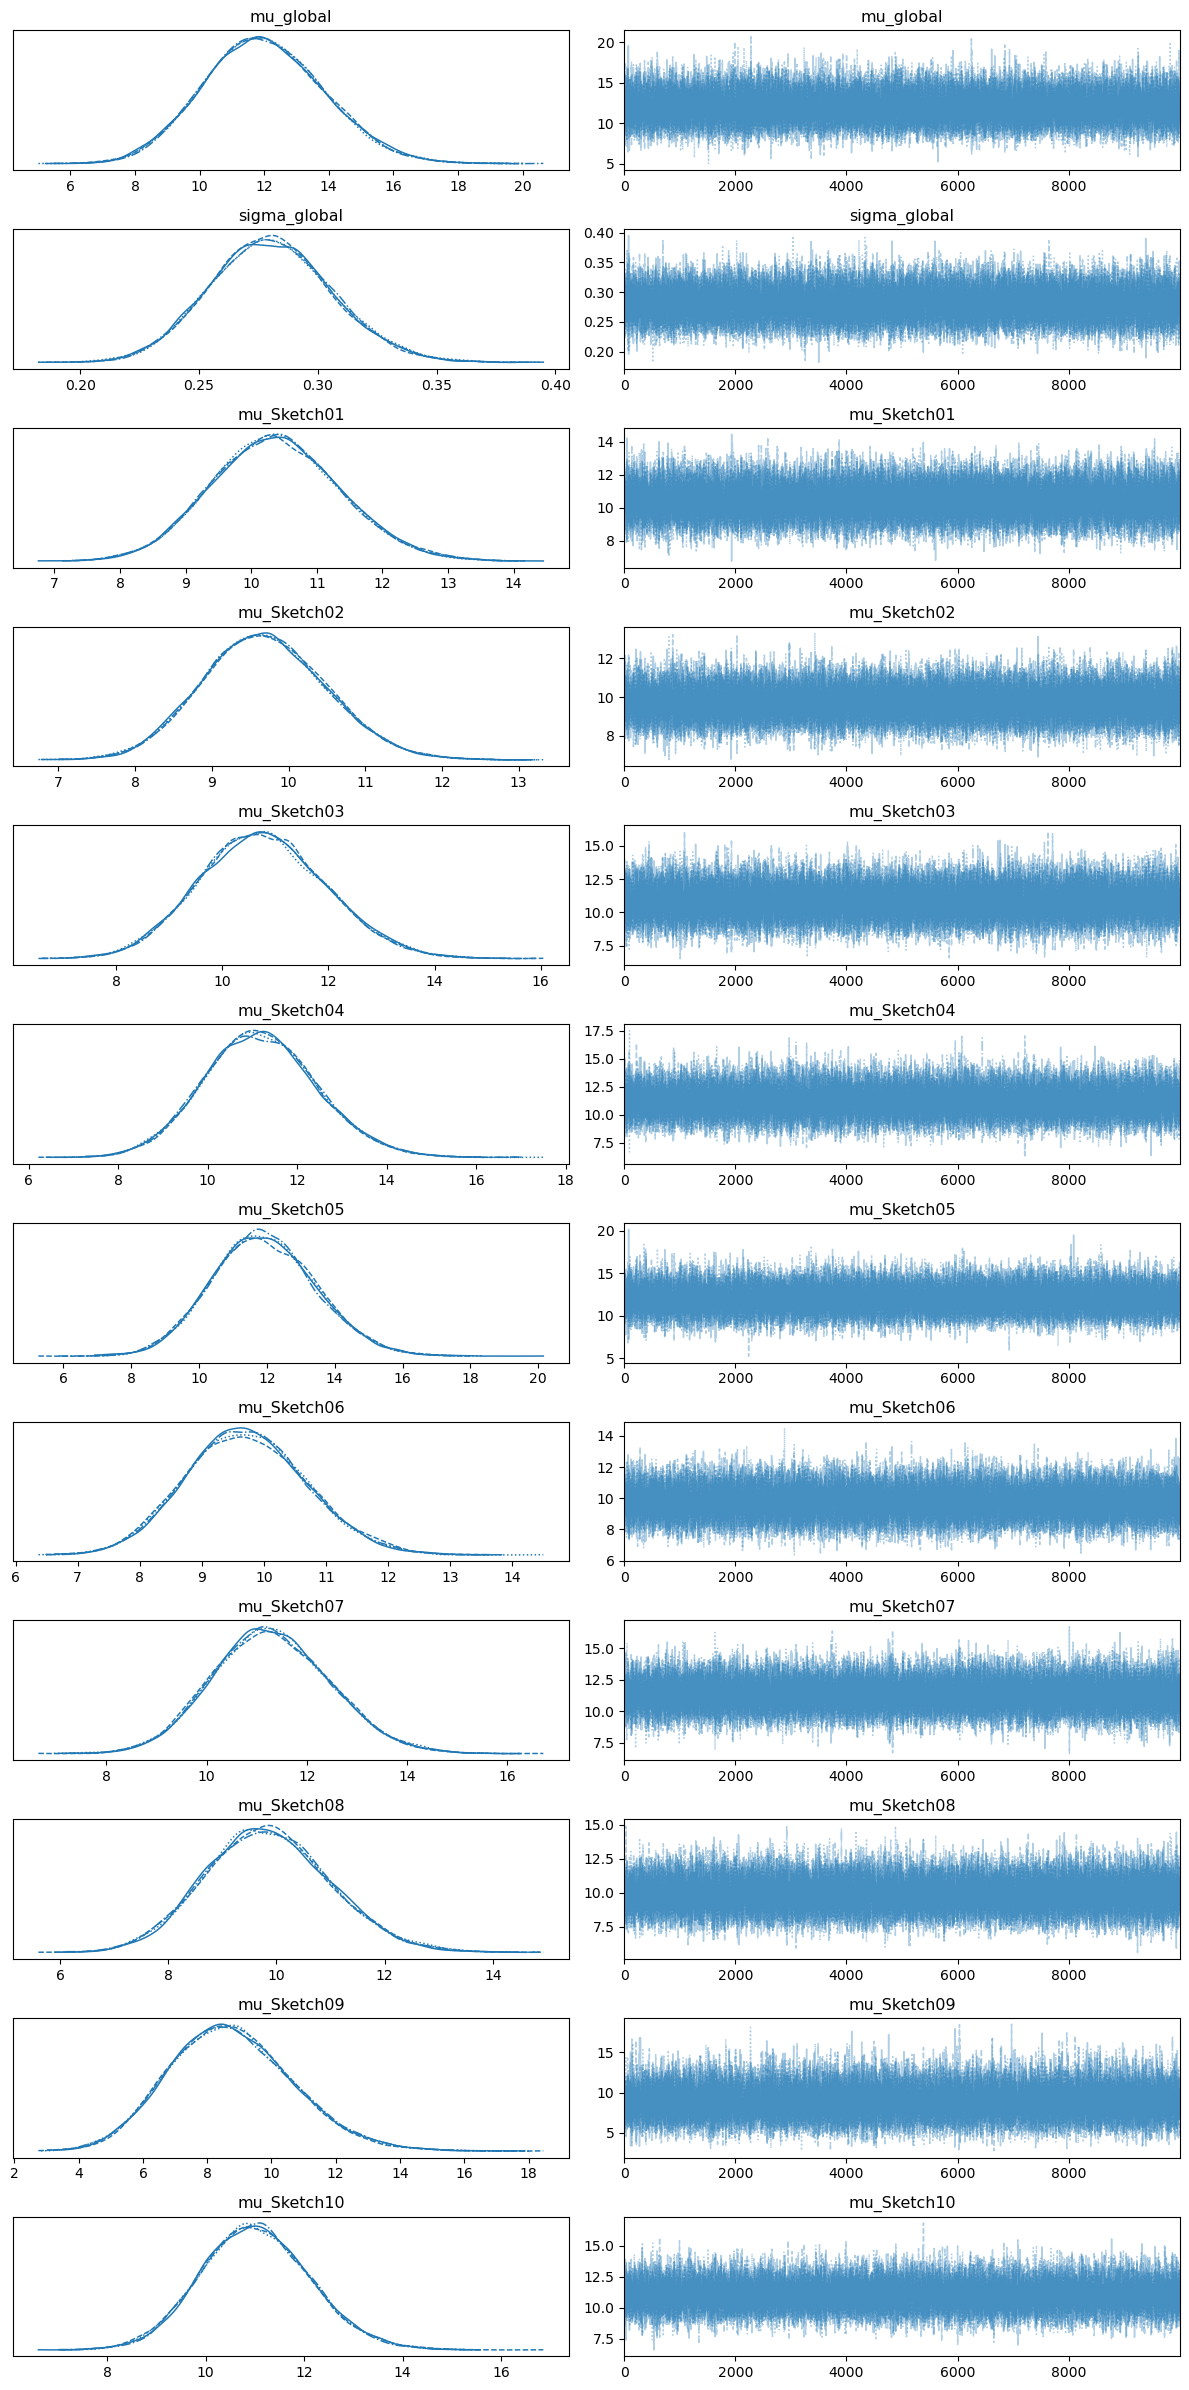

In [311]:
# Increase the maximum number of subplots
az.rcParams["plot.max_subplots"] = 200

# Define custom colors
custom_colors = {
    "diverging": "RdBu",
    "continuous": "viridis",
    "discrete": "plasma"
}
# Summarize and plot results
az.summary(trace)
az.plot_trace(trace, trace_kwargs={"color": custom_colors})
plt.tight_layout()
plt.show()

In [312]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_global,11.998,1.856,8.549,15.471,0.008,0.005,60885.0,30114.0,1.0
sigma_global,0.280,0.026,0.232,0.329,0.000,0.000,53539.0,32420.0,1.0
mu_Sketch01,10.382,0.979,8.601,12.277,0.004,0.003,65800.0,29145.0,1.0
mu_Sketch02,9.682,0.808,8.238,11.263,0.003,0.002,66343.0,28698.0,1.0
mu_Sketch03,10.775,1.195,8.544,13.025,0.005,0.003,69728.0,27521.0,1.0
mu_Sketch04,11.186,1.262,8.821,13.575,0.005,0.003,70824.0,27867.0,1.0
mu_Sketch05,11.911,1.535,9.050,14.810,0.006,0.004,68330.0,27429.0,1.0
mu_Sketch06,9.713,0.966,7.894,11.518,0.004,0.003,63958.0,28798.0,1.0
mu_Sketch07,11.298,1.171,9.144,13.521,0.004,0.003,74209.0,28546.0,1.0
mu_Sketch08,9.840,1.154,7.754,12.075,0.004,0.003,71258.0,28546.0,1.0


array([[<Axes: title={'center': 'mu_global'}>,
        <Axes: title={'center': 'sigma_global'}>,
        <Axes: title={'center': 'mu_Sketch01'}>],
       [<Axes: title={'center': 'mu_Sketch02'}>,
        <Axes: title={'center': 'mu_Sketch03'}>,
        <Axes: title={'center': 'mu_Sketch04'}>],
       [<Axes: title={'center': 'mu_Sketch05'}>,
        <Axes: title={'center': 'mu_Sketch06'}>,
        <Axes: title={'center': 'mu_Sketch07'}>],
       [<Axes: title={'center': 'mu_Sketch08'}>,
        <Axes: title={'center': 'mu_Sketch09'}>,
        <Axes: title={'center': 'mu_Sketch10'}>]], dtype=object)

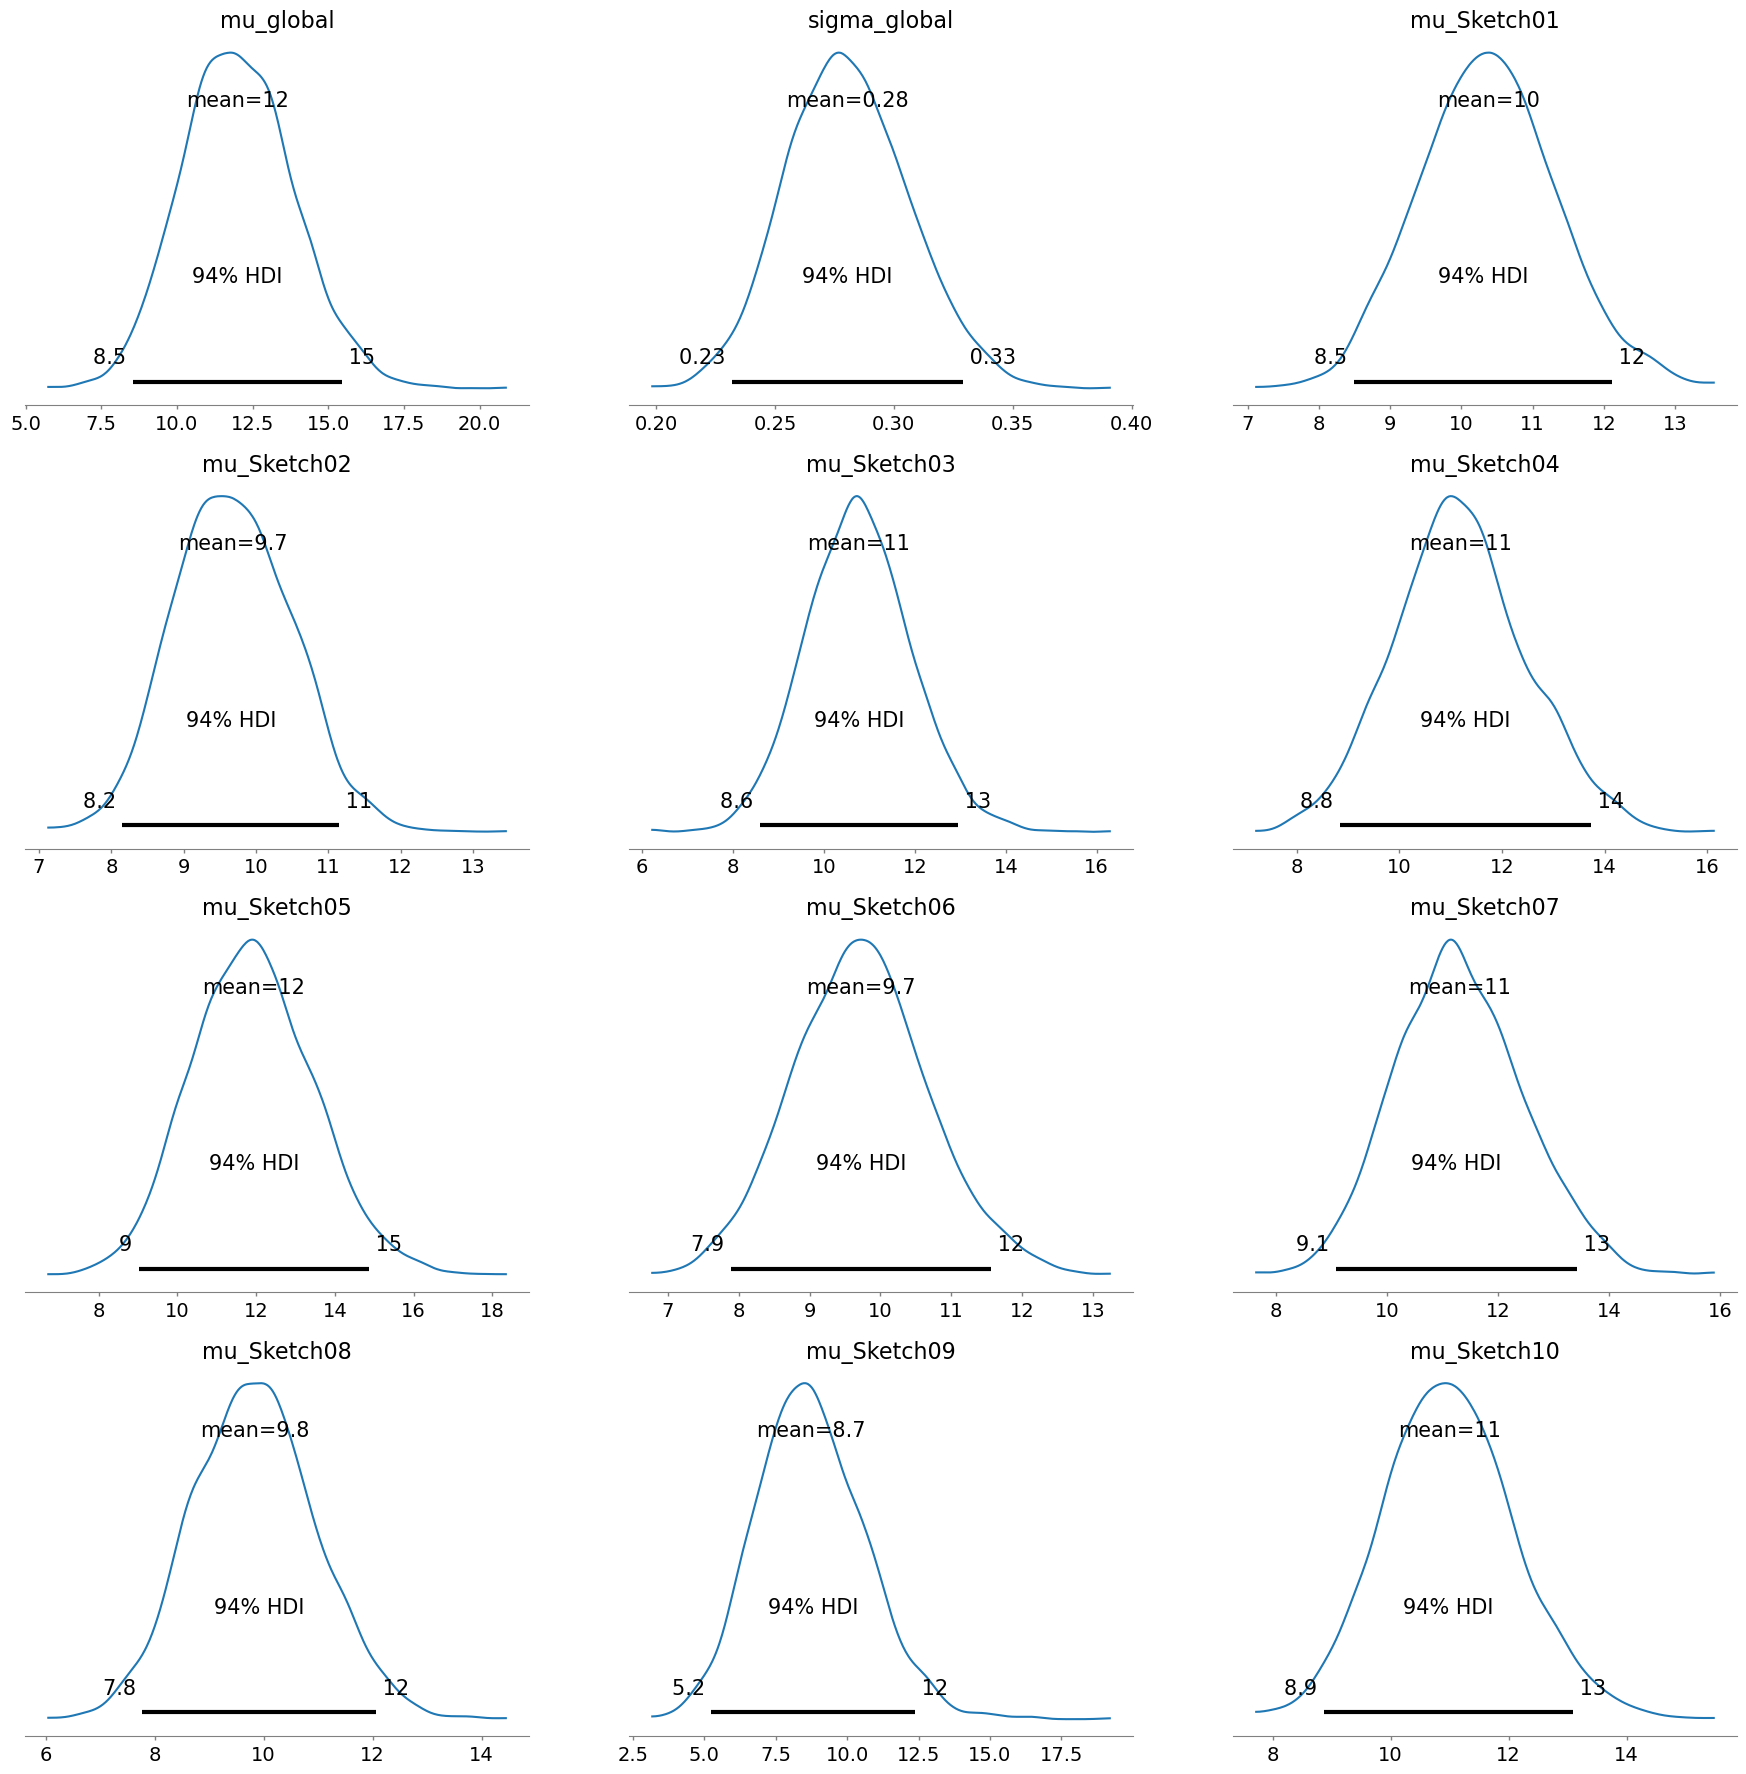

In [254]:
az.plot_posterior(trace)

In [340]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu_global,11.998,1.856,8.549,15.471,0.008,0.005,60885.0,30114.0,1.0
sigma_global,0.280,0.026,0.232,0.329,0.000,0.000,53539.0,32420.0,1.0
mu_Sketch01,10.382,0.979,8.601,12.277,0.004,0.003,65800.0,29145.0,1.0
mu_Sketch02,9.682,0.808,8.238,11.263,0.003,0.002,66343.0,28698.0,1.0
mu_Sketch03,10.775,1.195,8.544,13.025,0.005,0.003,69728.0,27521.0,1.0
mu_Sketch04,11.186,1.262,8.821,13.575,0.005,0.003,70824.0,27867.0,1.0
mu_Sketch05,11.911,1.535,9.050,14.810,0.006,0.004,68330.0,27429.0,1.0
mu_Sketch06,9.713,0.966,7.894,11.518,0.004,0.003,63958.0,28798.0,1.0
mu_Sketch07,11.298,1.171,9.144,13.521,0.004,0.003,74209.0,28546.0,1.0
mu_Sketch08,9.840,1.154,7.754,12.075,0.004,0.003,71258.0,28546.0,1.0


### Posterior Predictive Check

How well does the model fit the observed data?

array([[<Axes: xlabel='observed_intervals_Sketch01'>,
        <Axes: xlabel='observed_intervals_Sketch02'>,
        <Axes: xlabel='observed_intervals_Sketch03'>],
       [<Axes: xlabel='observed_intervals_Sketch04'>,
        <Axes: xlabel='observed_intervals_Sketch05'>,
        <Axes: xlabel='observed_intervals_Sketch06'>],
       [<Axes: xlabel='observed_intervals_Sketch07'>,
        <Axes: xlabel='observed_intervals_Sketch08'>,
        <Axes: xlabel='observed_intervals_Sketch09'>],
       [<Axes: xlabel='observed_intervals_Sketch10'>, <Axes: >, <Axes: >]],
      dtype=object)

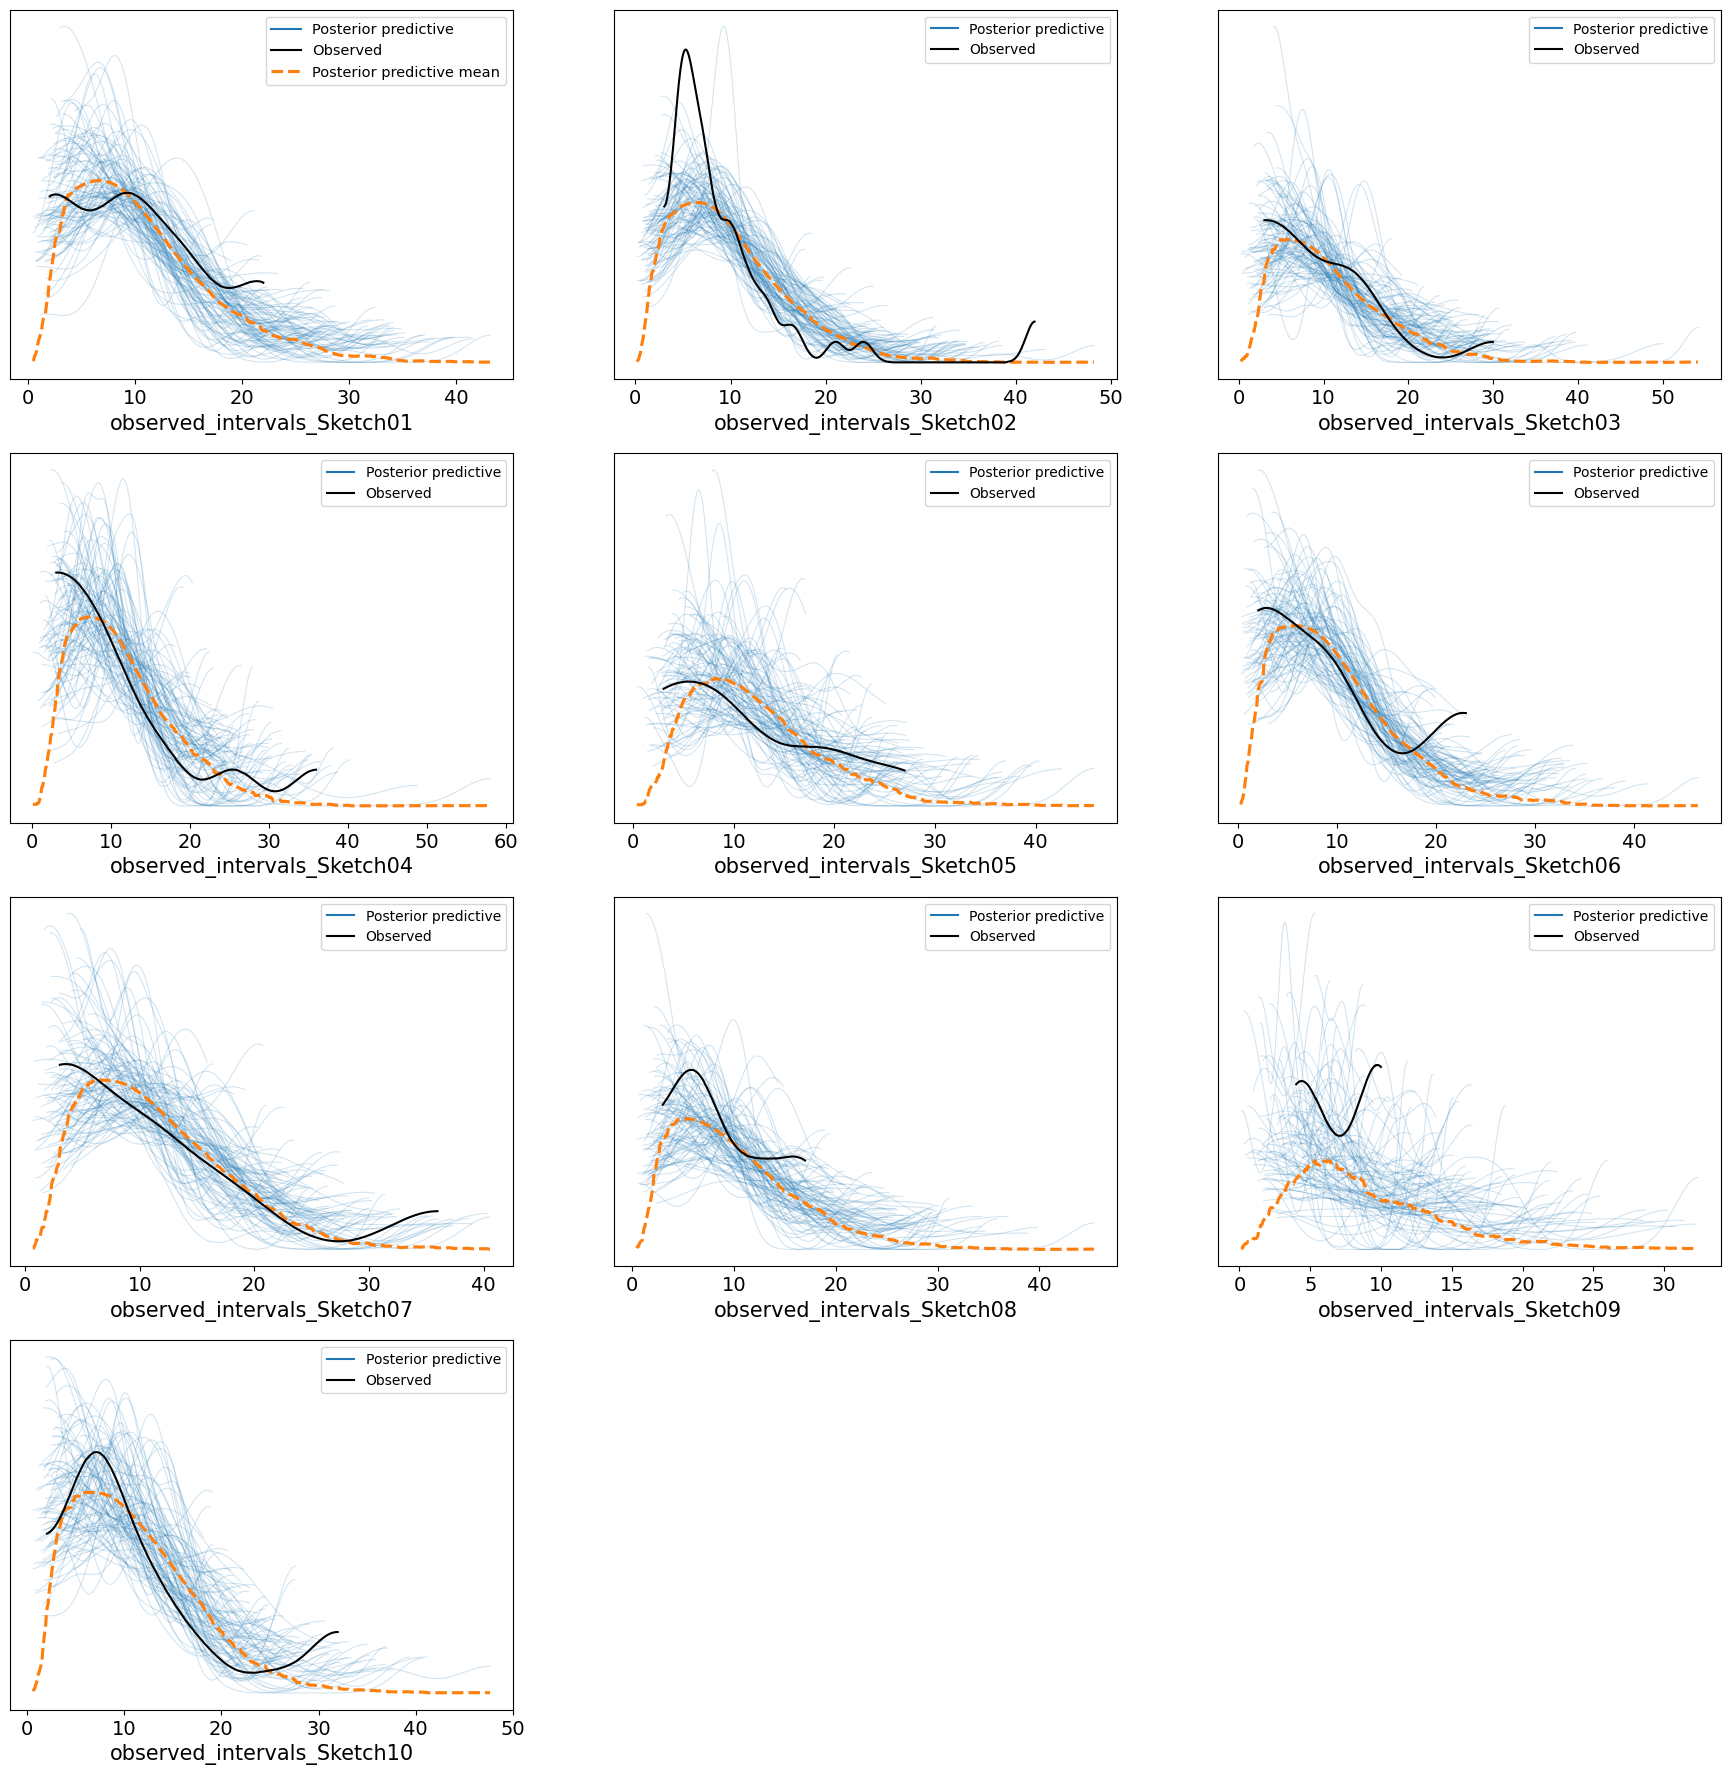

In [343]:
az.plot_ppc(trace, num_pp_samples=100)

# Predictions

In [313]:
with model:
    ppc = pm.sample_posterior_predictive(trace, extend_inferencedata=True)

Sampling: [observed_intervals_Sketch01, observed_intervals_Sketch02, observed_intervals_Sketch03, observed_intervals_Sketch04, observed_intervals_Sketch05, observed_intervals_Sketch06, observed_intervals_Sketch07, observed_intervals_Sketch08, observed_intervals_Sketch09, observed_intervals_Sketch10]


Output()

In [314]:
print(ppc)

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data


### Posterior Predictive Analysis of Comedy Routine Intervals

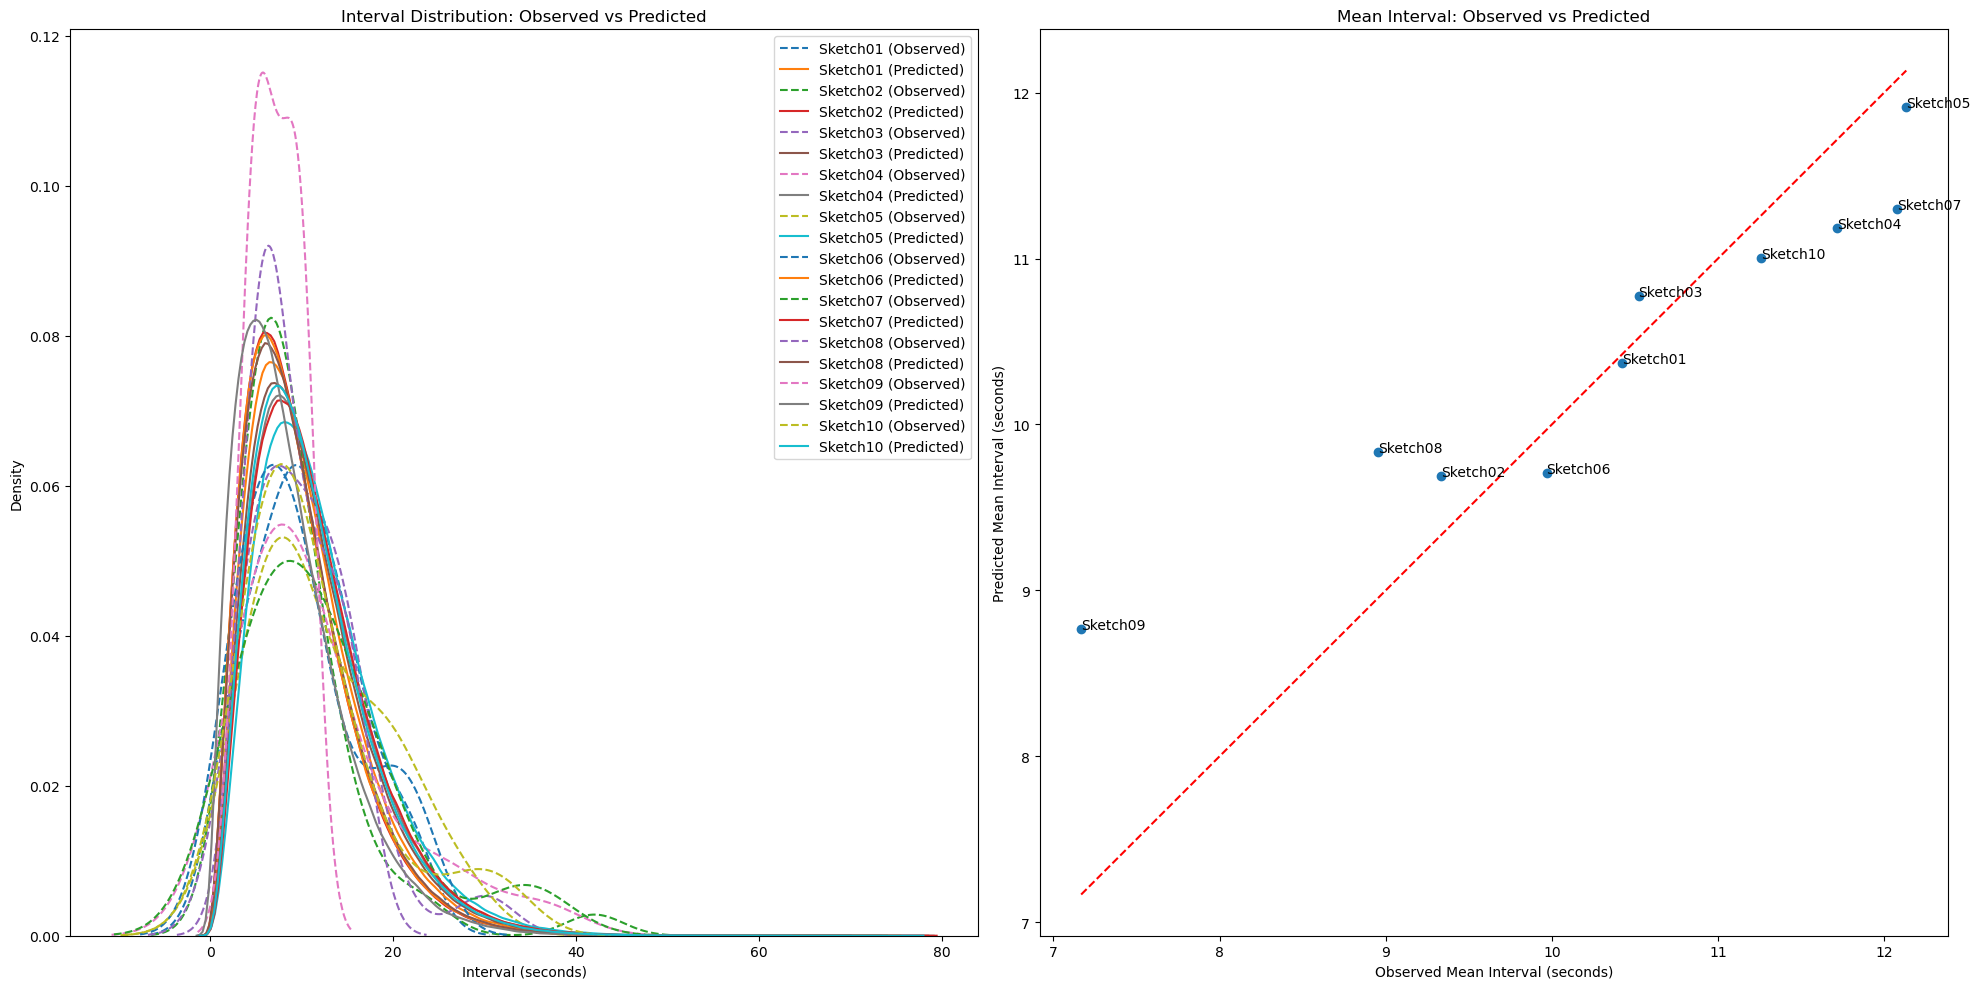

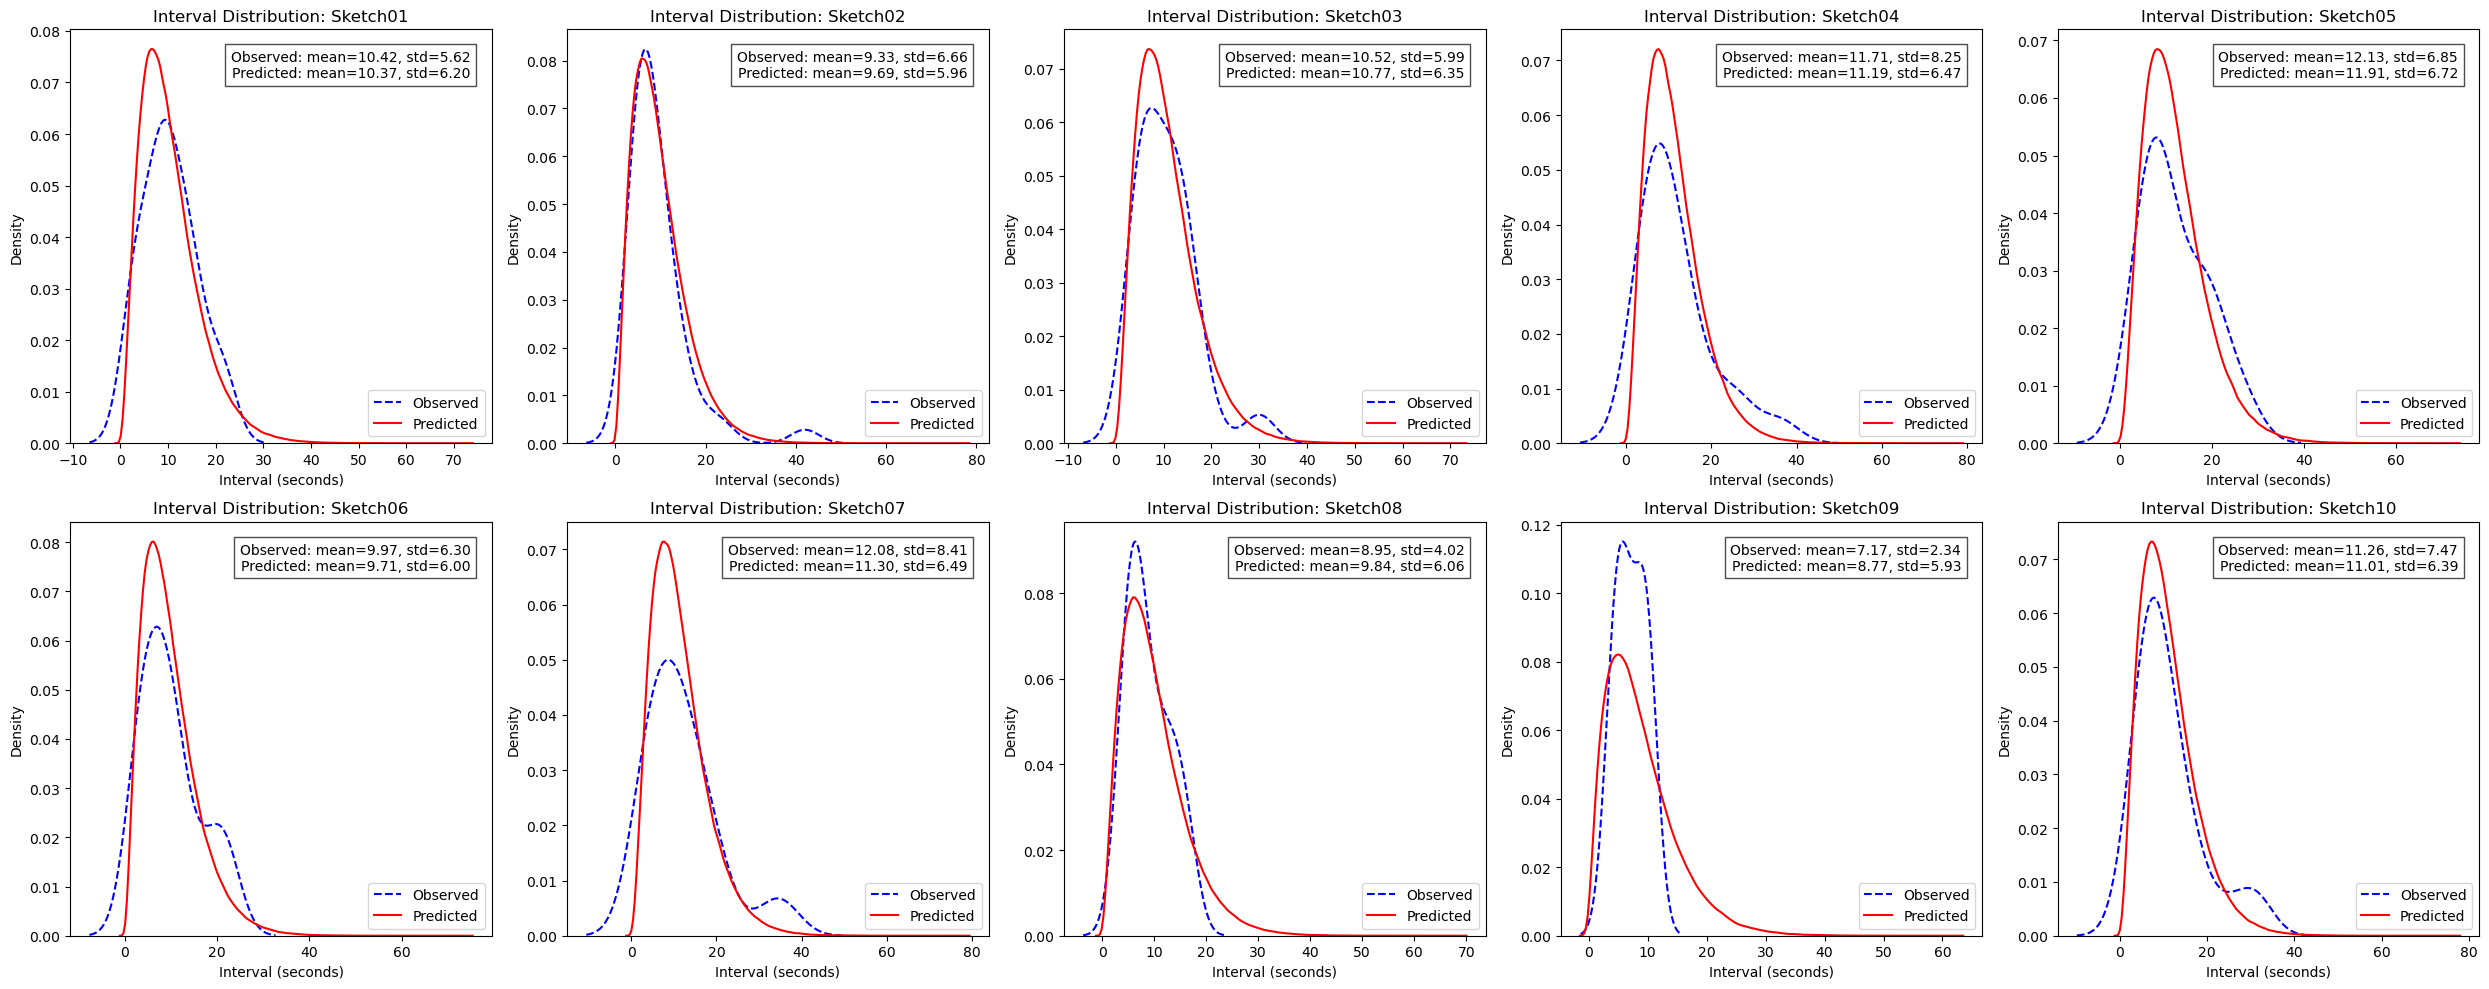

In [348]:
def plot_posterior_predictions(data, ppc):
    n_routines = len(data)
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    # 1. Interval Distribution Comparison
    ax = axes[0]
    for routine in data:
        routine_name = routine['routine_name']
        observed = np.diff([0] + [int(t.split(':')[0])*60 + int(t.split(':')[1]) for t in routine['laugh_timestamps']])
        predicted = ppc.posterior_predictive[f'observed_intervals_{routine_name}'].values.flatten()
        
        sns.kdeplot(observed, ax=ax, label=f"{routine_name} (Observed)", linestyle="--")
        sns.kdeplot(predicted, ax=ax, label=f"{routine_name} (Predicted)")
    
    ax.set_title("Interval Distribution: Observed vs Predicted")
    ax.set_xlabel("Interval (seconds)")
    ax.set_ylabel("Density")
    ax.legend(loc='upper right')

    # 2. Mean Interval Comparison
    ax = axes[1]
    observed_means = [np.mean(np.diff([0] + [int(t.split(':')[0])*60 + int(t.split(':')[1]) for t in routine['laugh_timestamps']])) for routine in data]
    predicted_means = [ppc.posterior_predictive[f'observed_intervals_{routine["routine_name"]}'].mean().values for routine in data]
    
    ax.scatter(observed_means, predicted_means)
    for i, routine in enumerate(data):
        ax.annotate(routine['routine_name'], (observed_means[i], predicted_means[i]))
    
    ax.plot([min(observed_means), max(observed_means)], [min(observed_means), max(observed_means)], 'r--')
    ax.set_title("Mean Interval: Observed vs Predicted")
    ax.set_xlabel("Observed Mean Interval (seconds)")
    ax.set_ylabel("Predicted Mean Interval (seconds)")

    plt.tight_layout()
    plt.show()

    fig, axes = plt.subplots(2, 5, figsize=(25, 10))
    axes = axes.flatten()  # Flatten the 2x5 array to easily iterate over it

    for i, (ax, routine) in enumerate(zip(axes, data)):
        routine_name = routine['routine_name']
        
        # Calculate observed intervals
        observed = np.diff([0] + [int(t.split(':')[0])*60 + int(t.split(':')[1]) for t in routine['laugh_timestamps']])
        
        # Get predicted intervals
        predicted = ppc.posterior_predictive[f'observed_intervals_{routine_name}'].values.flatten()
        
        # Plot observed intervals
        sns.kdeplot(observed, ax=ax, label="Observed", linestyle="--", color='blue')
        
        # Plot predicted intervals
        sns.kdeplot(predicted, ax=ax, label="Predicted", color='red')
        
        # Set titles and labels
        ax.set_title(f"Interval Distribution: {routine_name}")
        ax.set_xlabel("Interval (seconds)")
        ax.set_ylabel("Density")
        ax.legend()
        
        # Add text with basic statistics
        obs_mean, obs_std = np.mean(observed), np.std(observed)
        pred_mean, pred_std = np.mean(predicted), np.std(predicted)
        stats_text = f"Observed: mean={obs_mean:.2f}, std={obs_std:.2f}\nPredicted: mean={pred_mean:.2f}, std={pred_std:.2f}"
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.7))
    
    plt.tight_layout()
    plt.show()    

plot_posterior_predictions(data, ppc)

# Create a new hypothetical routine

The next step is to generate a new time series routine. If you no ideas or a rough sketch to work with, you could start there.

In [316]:
new_routine_duration = 173

This is just a sanity check to see what's inside the posterior predictive, because that's what we're pulling from in the next section of code.

In [317]:
print(ppc.posterior_predictive.data_vars['observed_intervals_Sketch01'])

<xarray.DataArray 'observed_intervals_Sketch01' (chain: 4, draw: 10000,
                                                 observed_intervals_Sketch01_dim_2: 33)>
array([[[15.85925773,  4.8192188 , 10.53885674, ...,  6.85211026,
          9.90050828,  8.97190499],
        [ 4.42873337, 12.59823669, 12.67391502, ...,  6.70433786,
         11.64692788, 11.10270206],
        [ 4.60458105, 15.28944694,  9.10063649, ..., 16.29122711,
         14.25385003, 14.23555018],
        ...,
        [18.5861461 ,  7.2614826 ,  6.45713569, ...,  3.58349138,
         11.65612638,  9.00367025],
        [ 7.39081492,  9.44765933, 28.44020785, ..., 13.97600523,
         12.07889791, 10.14639459],
        [10.70324841,  4.9402669 ,  8.52745192, ...,  8.75935647,
         12.8887675 ,  4.85217771]],

       [[24.40017953, 10.93267163, 14.12374511, ...,  7.44115657,
          6.02751796, 13.44835112],
        [ 6.32827411,  8.92773813,  0.63340195, ...,  8.4823499 ,
         15.43424746, 17.32837109],
        

In [327]:
def generate_hypothetical_routine(posterior_predictive, duration_seconds, routine_name="HypotheticalRoutine"):
    # Get all sketch names
    sketch_names = [key.split('_')[-1] for key in posterior_predictive.data_vars if key.startswith('observed_intervals_')]
    
    # We sample intervals from all chains and draws, for all sketches
    all_intervals = []
    for sketch in sketch_names:
        # Sample from all chains and draws
        intervals = posterior_predictive[f'observed_intervals_{sketch}'].values.flatten()
        # Filter out potential placeholder values (e.g., very large values or zeros)
        intervals = intervals[(intervals > 0) & (intervals < 100)]
        all_intervals.extend(intervals)

    print(f'Num sampled predicted intervals to pull from: {len(all_intervals)}')
    
    # Generate laugh timestamps
    laugh_timestamps = [0]
    current_time = 0
    # This works by building up the routine, joke by joke. We keep adding time stamps until we reach the duration.
    while current_time < duration_seconds:
        # Randomly sample an interval from the observed intervals
        interval = np.random.choice(all_intervals)
        # Clip interval between 3 and 20 seconds. The lower end is realistic, and was set in the model. The high end is just personal preference.
        interval = np.clip(interval, 3, 20)  
        current_time += interval
        if current_time <= duration_seconds:
            laugh_timestamps.append(current_time)
    
    # Ensure the last laugh is at the end of the routine
    if laugh_timestamps[-1] < duration_seconds:
        laugh_timestamps.append(duration_seconds)
    
    # Convert timestamps to MM:SS format
    timestamp_strings = [f"{int(t // 60):02d}:{int(t % 60):02d}" for t in laugh_timestamps[1:]]  # Skip the first laugh at 0
    
    # Calculate additional statistics
    joke_count = len(timestamp_strings)
    mean_interval = np.mean(np.diff(laugh_timestamps))
    mean_jokes_per_minute = (joke_count / duration_seconds) * 60
    
    # Create the routine record
    routine = {
        'routine_name': routine_name,
        'mean_interval': round(mean_interval, 1),
        'mean_jokes_per_minute': round(mean_jokes_per_minute, 1),
        'joke_count': joke_count,
        'duration_seconds': duration_seconds,
        'laugh_timestamps': timestamp_strings
    }
    
    return routine

new_routine = generate_hypothetical_routine(ppc.posterior_predictive, duration_seconds=173, routine_name="NewSketch")
print(new_routine)

Num sampled predicted intervals to pull from: 9920000
{'routine_name': 'NewSketch', 'mean_interval': 10.2, 'mean_jokes_per_minute': 5.9, 'joke_count': 17, 'duration_seconds': 173, 'laugh_timestamps': ['00:04', '00:24', '00:36', '00:46', '01:04', '01:11', '01:20', '01:29', '01:45', '01:56', '02:13', '02:16', '02:29', '02:32', '02:36', '02:51', '02:53']}


### Dataframe output for readability

In [328]:
def routine_to_dataframe(routine):
    timestamps = routine['laugh_timestamps']
    seconds = [int(ts.split(':')[0])*60 + int(ts.split(':')[1]) for ts in timestamps]
    durations = [seconds[0]] + [seconds[i] - seconds[i-1] for i in range(1, len(seconds))]
    
    df = pd.DataFrame({
        'timestamp': timestamps,
        'duration_seconds': durations
    })
    
    df.attrs['total_duration'] = routine['duration_seconds']
    
    return df


# Convert the new_routine to a DataFrame
df_routine = routine_to_dataframe(new_routine)

print(f'Routine Duration: {df_routine.attrs["total_duration"]} seconds')
df_routine.head(50)

Routine Duration: 173 seconds


,timestamp,duration_seconds
0,00:04,4
1,00:24,20
2,00:36,12
3,00:46,10
4,01:04,18
5,01:11,7
6,01:20,9
7,01:29,9
8,01:45,16
9,01:56,11


### Hypothetical model comparison to observed routines

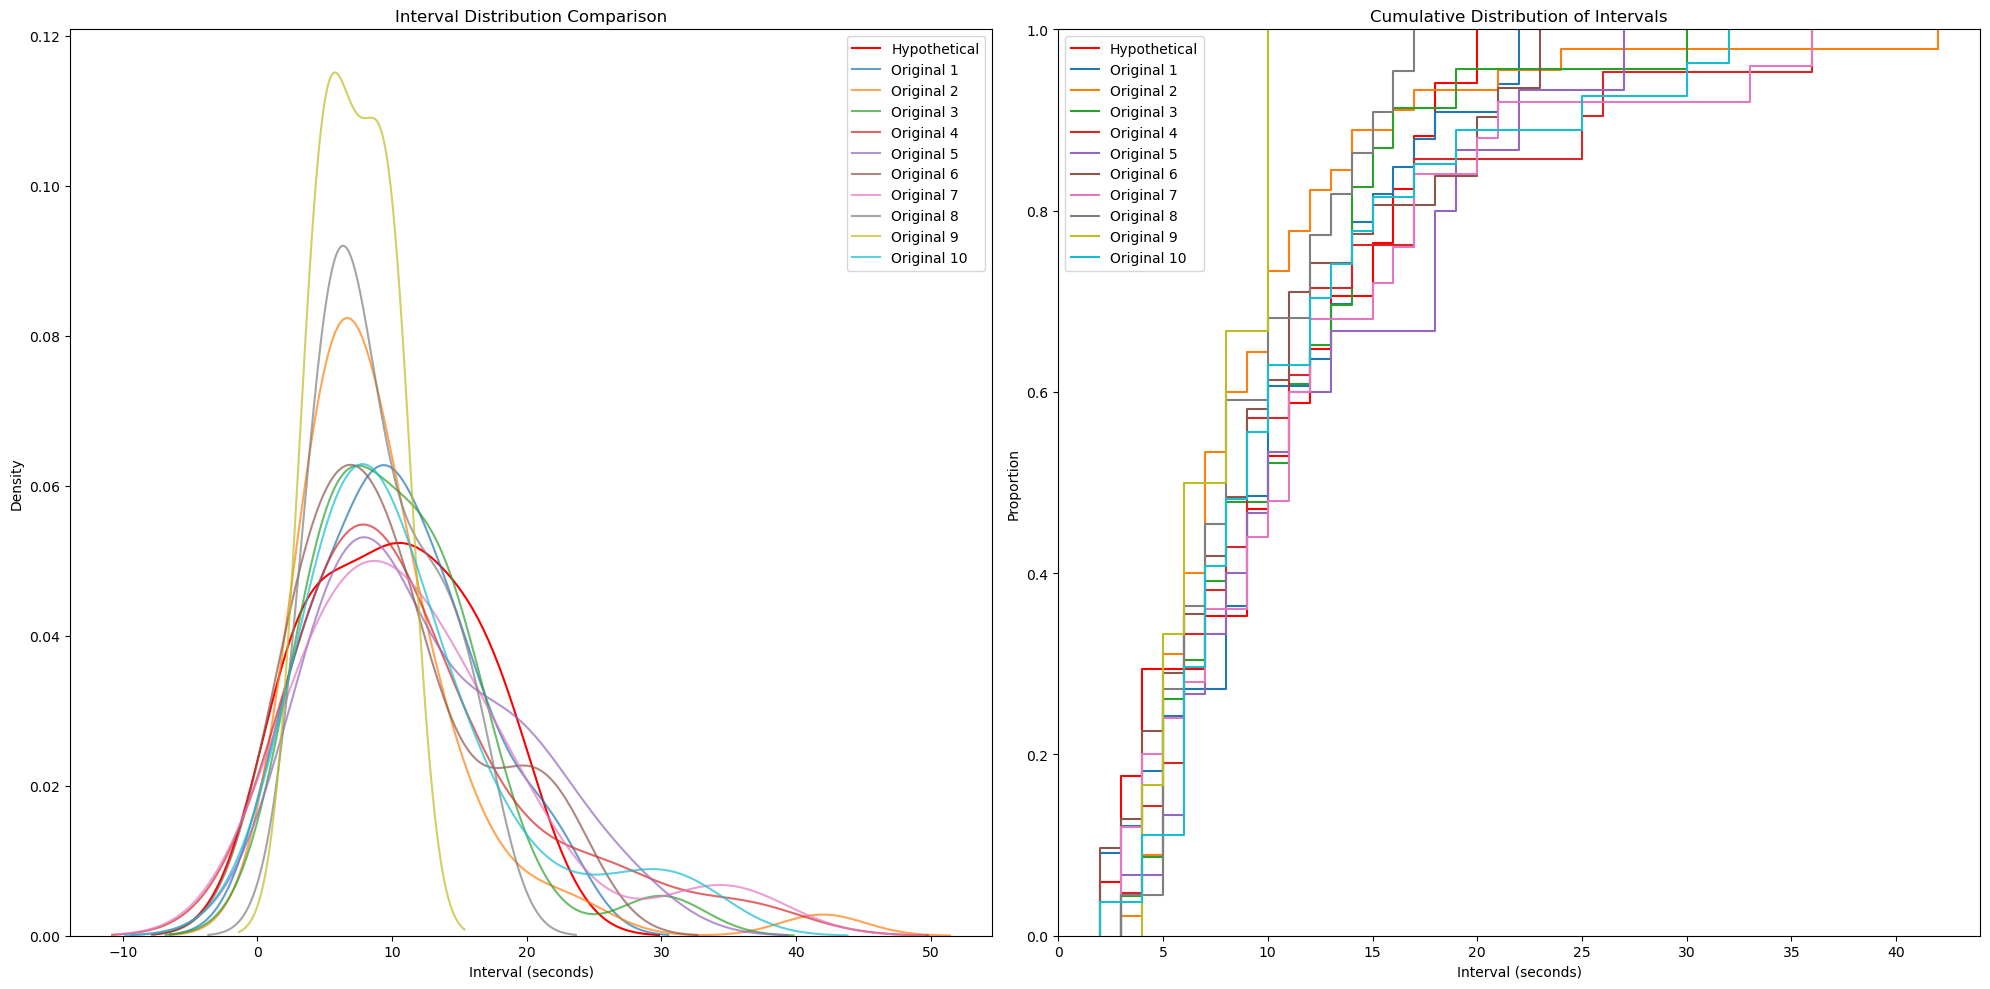

In [338]:
def compare_routine(hypothetical_routine, original_datasets):

    # Extract relevant data
    hyp_intervals = np.diff([0] + [int(t.split(':')[0])*60 + int(t.split(':')[1]) for t in hypothetical_routine['laugh_timestamps']])
    orig_intervals = [np.diff([0] + [int(t.split(':')[0])*60 + int(t.split(':')[1]) for t in routine['laugh_timestamps']]) for routine in original_datasets]
    
    # Create plots
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    
    # 1. Interval Distribution Comparison
    ax = axes[0]
    sns.kdeplot(hyp_intervals, ax=ax, color='red', label='Hypothetical')
    for i, intervals in enumerate(orig_intervals):
        sns.kdeplot(intervals, ax=ax, alpha=0.7, label=f'Original {i+1}')
    ax.set_title('Interval Distribution Comparison')
    ax.set_xlabel('Interval (seconds)')
    ax.set_ylabel('Density')
    ax.legend()
    
    # 3. Cumulative Distribution Comparison
    ax = axes[1]
    sns.ecdfplot(hyp_intervals, ax=ax, color='red', label='Hypothetical')
    for i, intervals in enumerate(orig_intervals):
        sns.ecdfplot(intervals, ax=ax, label=f'Original {i+1}')
    ax.set_title('Cumulative Distribution of Intervals')
    ax.set_xlabel('Interval (seconds)')
    ax.legend()
    
    plt.tight_layout()
    plt.show()


compare_routine(new_routine, data)

### Plot a time series

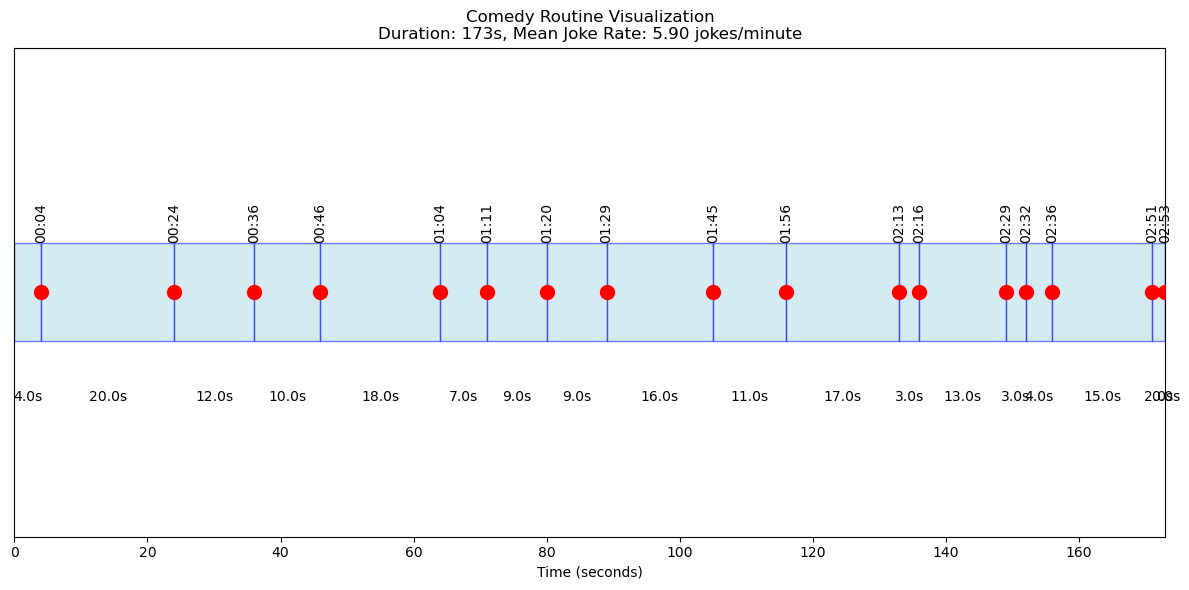

In [330]:
from matplotlib.patches import Rectangle

def plot_routine(routine):
    # Extract data from the routine
    duration = routine['duration_seconds']
    timestamps = [int(ts.split(':')[0])*60 + int(ts.split(':')[1]) for ts in routine['laugh_timestamps']]
    
    # Calculate intervals and mean joke rate
    intervals = np.diff([0] + timestamps + [duration])
    mean_joke_rate = len(timestamps) / (duration / 60)  # jokes per minute

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Plot joke timestamps
    ax.scatter(timestamps, [1]*len(timestamps), color='red', s=100, zorder=3)
    
    # Plot intervals
    for i, (start, end) in enumerate(zip([0] + timestamps, timestamps + [duration])):
        rect = Rectangle((start, 0.9), end - start, 0.2, facecolor='lightblue', edgecolor='blue', alpha=0.5)
        ax.add_patch(rect)
        if i < len(intervals):
            ax.text((start + end) / 2, 0.8, f"{intervals[i]:.1f}s", ha='center', va='top')
    
    # Set labels and title
    ax.set_xlabel('Time (seconds)')
    ax.set_yticks([])
    ax.set_xlim(0, duration)
    ax.set_ylim(0.5, 1.5)
    ax.set_title(f"Comedy Routine Visualization\nDuration: {duration}s, Mean Joke Rate: {mean_joke_rate:.2f} jokes/minute")
    
    # Add routine length annotation
    #ax.annotate(f'Routine Length: {duration}s', xy=(duration, 1), xytext=(duration, 1.3),
    #            arrowprops=dict(facecolor='black', shrink=0.05), ha='right')
    
    # Add timestamps
    for ts in timestamps:
        ax.annotate(f'{ts//60:02d}:{ts%60:02d}', xy=(ts, 1), xytext=(ts, 1.1), 
                    ha='center', va='bottom', rotation=90)
    
    plt.tight_layout()
    plt.show()

plot_routine(new_routine)

# Recorded Comedy Routine

Theory doesn't matter unless you apply it 🐱🐱🐱...

https://youtu.be/qfJLRpvajRA?si=2J-zUQpeussQ2OfQ

# New Routine Time Series

Note: As stated in the analysis report, this routine does not match the one generated previously. Many routines were generated post-production, as the code was cleaned up and additional plots developed. That's a feature, not a side-effect.

| Timestamp | Duration (seconds) | Text |
|-----------|--------------------|------|
| 0:09      | 9                  | I was snacking on some goldfish crackers recently—you know, the ones made from processed everything. |
| 0:21      | 12                 | Fake cheese, fake flour, fake color... which makes perfect sense when you think about it - it's a fake fish! It's not even gold. It's orange. |
| 0:24      | 3                  | But you bite into it, and it’s like: ‘Mmm, delicious... wait, is this even food?’ |
| 0:27      | 3                  | Who cares! Parents throw these things on the ground for their kids to keep them busy for ten minutes. |
| 0:41      | 14                 | Meanwhile, my CAT—my CAT—is over there living the high life with gourmet cat food. I dump this can out onto a plate, and I notice this isn’t just fancy kibble; it’s like a seafood buffet. Tuna, salmon, tiny shrimp, and—wait, are those PEAS in there? |
| 0:45      | 4                  | Why are there peas in there? |
| 0:48      | 3                  | Why are there PEAS in my cat's cat food? |
| 0:54      | 6                  | What’s going to happen here? Cat's gonna be like—'Oh, num, num, num. Oh, these peas are so delicious.' |
| 1:02      | 8                  | I can’t let him outside where the garden is. He’s gonna be running through it. 'Oh my gosh, there’s a pea pod out here.' |
| 1:12      | 10                 | I must have died and gone to kitty heaven. Oh wait—what’s over there? Is that broccoli? Num num num num num. So delicious. |
| 1:25      | 13                 | I'm passing by the catnip. I'm not even going to eat a big pile of grass so I can go back inside and throw it up on the carpet. I'm heading right over to the vegetarian section. |
| 1:39      | 14                 | No, that didn’t happen. The cat eats around the peas. He’s not dumb. He’s eating all the shrimp. He’s eating all the tuna, the salmon—what’s left behind is a big old pile of peas. |
| 1:47      | 8                  | And of course, in our day and age, we can’t waste anything because that would be bad. |
| 1:52      | 5                  | We don’t want to throw away food. It’s bad for the environment. |
| 1:59      | 7                  | So, I eat them. I know, that’s how I get my veggies. They’re not bad. |
| 2:09      | 10                 | I mean, they take the slight flavor of shrimp because they’ve been in a can with shrimp for so long. |
| 2:21      | 12                 | But if I’m already eating fake cheese fish, I might as well have some shrimpy peas and convince myself I’m eating healthy. |
| 2:27      | 6                  | I’m over here with a box of bottom-shelf snacks and leftovers... |
| 2:37      | 10                 | and my cat’s basically eating a $25 sushi roll. |
| 2:40      | 3                  | Who’s winning this game? |